In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import preprocess
import pickle 
import keras

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# creating dictionary for labels
class_labels = {str(x):x for x in range(10)}
class_labels.update({'+':10, 'times':11, '-':12 })
label_class = dict( zip(class_labels.values(), class_labels.keys() ))

path1 = './Equation data/'
temp1 = np.load(path1+'Equations_images_1.npy')
temp2 = np.load(path1+'Equations_images_2.npy')
temp3 = np.load(path1+'Equations_images_3.npy')
temp4 = np.load(path1+'Equations_images_4.npy')
eqn_full = [temp1]

# Loading saved models for prediction
path = './trained models/'
adastage1_ver1,adadigits_ver1, adachars_ver1, rfmodel_ver1, MLP_single_ver1, cnn_ver1 = preprocess.load_models(path,1)
adastage1_ver2,adadigits_ver2, adachars_ver2, rfmodel_ver2, MLP_single_ver2, cnn_ver2 = preprocess.load_models(path,2)

Loaded models from disk
Loaded models from disk


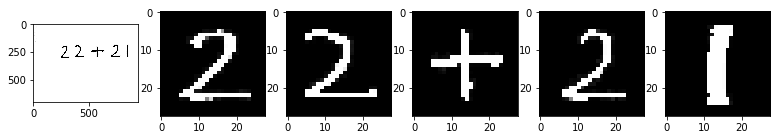

RF model_ver1 result :  2 times + 2 + 
adaboost_ver1 2 stage model result :  8 2 9 2 8 
MLP_ver1 single stage model result :  2 2 + 2 1 
CNN_ver1 model result :  2 2 + 2 1 

RF model_ver2 result :  8 times + 2 + 
adaboost_ver2 2 stage model result :  8 2 4 2 1 
MLP single_ver2 stage model result :  2 2 + 2 1 
CNN_ver2 model result :  2 2 + 2 1 


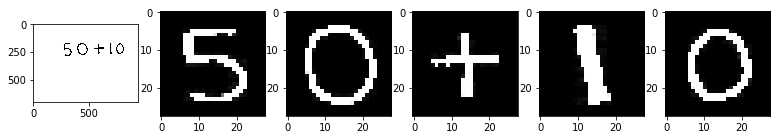

RF model_ver1 result :  3 0 + + 0 
adaboost_ver1 2 stage model result :  5 5 4 8 0 
MLP_ver1 single stage model result :  5 0 + 1 0 
CNN_ver1 model result :  5 0 + 1 0 

RF model_ver2 result :  3 0 + + 0 
adaboost_ver2 2 stage model result :  5 5 4 8 0 
MLP single_ver2 stage model result :  5 0 + 1 0 
CNN_ver2 model result :  5 0 + 1 0 


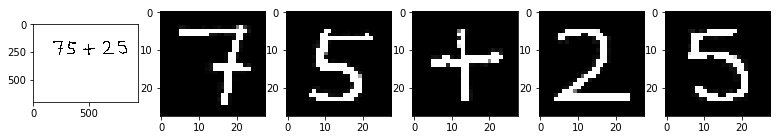

RF model_ver1 result :  - times + 2 3 
adaboost_ver1 2 stage model result :  4 5 4 2 3 
MLP_ver1 single stage model result :  3 5 + 2 5 
CNN_ver1 model result :  3 5 + 2 5 

RF model_ver2 result :  3 5 + 2 3 
adaboost_ver2 2 stage model result :  3 5 4 2 3 
MLP single_ver2 stage model result :  7 5 + 2 5 
CNN_ver2 model result :  7 5 + 2 5 


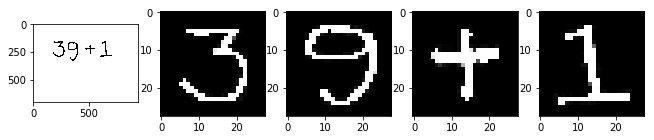

RF model_ver1 result :  0 0 + + 
adaboost_ver1 2 stage model result :  3 5 9 3 
MLP_ver1 single stage model result :  3 5 7 3 
CNN_ver1 model result :  3 5 + 1 

RF model_ver2 result :  0 0 + 1 
adaboost_ver2 2 stage model result :  3 5 9 5 
MLP single_ver2 stage model result :  3 5 + 3 
CNN_ver2 model result :  3 9 + 1 


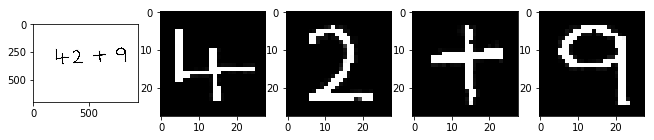

RF model_ver1 result :  + 2 + - 
adaboost_ver1 2 stage model result :  4 2 9 5 
MLP_ver1 single stage model result :  7 2 7 9 
CNN_ver1 model result :  + 2 + 9 

RF model_ver2 result :  + 2 + - 
adaboost_ver2 2 stage model result :  4 2 9 4 
MLP single_ver2 stage model result :  4 2 + 4 
CNN_ver2 model result :  4 2 + 9 


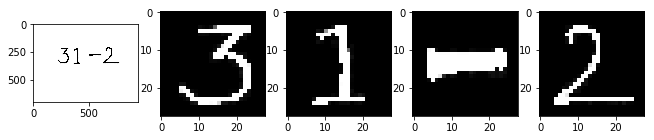

RF model_ver1 result :  0 + - times 
adaboost_ver1 2 stage model result :  0 3 4 8 
MLP_ver1 single stage model result :  3 1 7 3 
CNN_ver1 model result :  3 1 7 2 

RF model_ver2 result :  0 + - 1 
adaboost_ver2 2 stage model result :  3 1 4 1 
MLP single_ver2 stage model result :  5 3 4 2 
CNN_ver2 model result :  3 1 7 2 


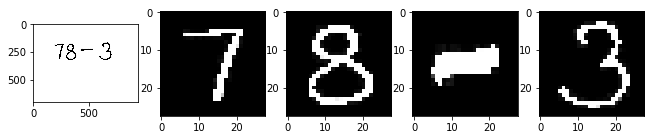

RF model_ver1 result :  3 times + - 
adaboost_ver1 2 stage model result :  3 3 4 3 
MLP_ver1 single stage model result :  7 8 4 3 
CNN_ver1 model result :  7 8 5 3 

RF model_ver2 result :  7 times + 7 
adaboost_ver2 2 stage model result :  3 3 - 3 
MLP single_ver2 stage model result :  7 8 - 3 
CNN_ver2 model result :  7 8 times 3 


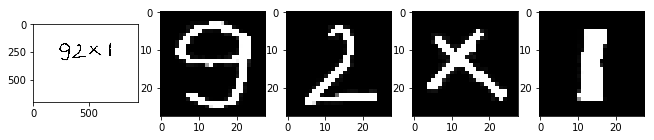

RF model_ver1 result :  + 2 times + 
adaboost_ver1 2 stage model result :  5 8 5 8 
MLP_ver1 single stage model result :  5 2 times 1 
CNN_ver1 model result :  9 2 times 1 

RF model_ver2 result :  - 1 times + 
adaboost_ver2 2 stage model result :  5 1 5 8 
MLP single_ver2 stage model result :  5 2 4 1 
CNN_ver2 model result :  9 2 times 1 


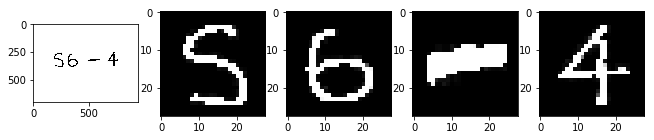

RF model_ver1 result :  times - + 4 
adaboost_ver1 2 stage model result :  5 5 4 4 
MLP_ver1 single stage model result :  5 5 7 4 
CNN_ver1 model result :  5 6 7 4 

RF model_ver2 result :  - - + + 
adaboost_ver2 2 stage model result :  5 5 4 4 
MLP single_ver2 stage model result :  5 5 7 4 
CNN_ver2 model result :  5 5 7 4 


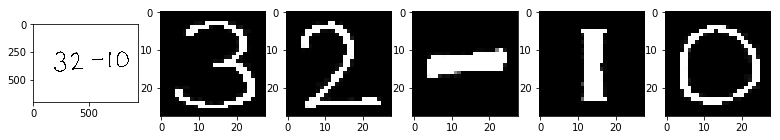

RF model_ver1 result :  - 2 - + 0 
adaboost_ver1 2 stage model result :  3 1 4 1 5 
MLP_ver1 single stage model result :  3 3 4 1 0 
CNN_ver1 model result :  3 2 - 1 0 

RF model_ver2 result :  7 1 - + 0 
adaboost_ver2 2 stage model result :  3 1 4 1 5 
MLP single_ver2 stage model result :  3 2 - 1 0 
CNN_ver2 model result :  3 2 - 1 0 


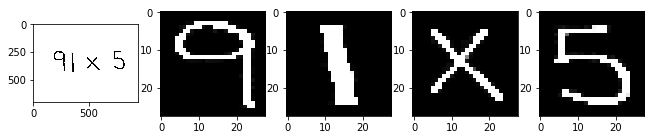

RF model_ver1 result :  0 + times 3 
adaboost_ver1 2 stage model result :  5 8 5 5 
MLP_ver1 single stage model result :  3 1 times 5 
CNN_ver1 model result :  5 1 times 5 

RF model_ver2 result :  0 + times - 
adaboost_ver2 2 stage model result :  5 8 5 5 
MLP single_ver2 stage model result :  1 1 4 5 
CNN_ver2 model result :  7 1 times 5 


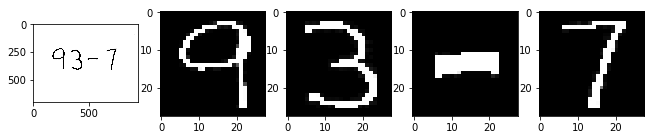

RF model_ver1 result :  - - - 7 
adaboost_ver1 2 stage model result :  5 3 times 4 
MLP_ver1 single stage model result :  4 3 + 1 
CNN_ver1 model result :  9 3 - 1 

RF model_ver2 result :  - - - 7 
adaboost_ver2 2 stage model result :  6 3 - 1 
MLP single_ver2 stage model result :  4 3 - 3 
CNN_ver2 model result :  9 3 - 7 


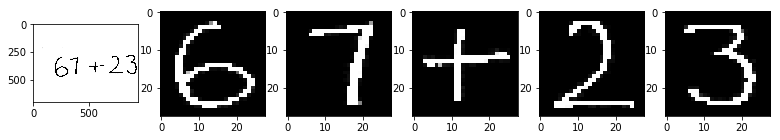

RF model_ver1 result :  - 7 + 2 0 
adaboost_ver1 2 stage model result :  3 3 5 2 5 
MLP_ver1 single stage model result :  2 7 8 2 3 
CNN_ver1 model result :  6 1 + 2 3 

RF model_ver2 result :  - 7 + 2 0 
adaboost_ver2 2 stage model result :  3 3 8 3 3 
MLP single_ver2 stage model result :  5 7 7 2 3 
CNN_ver2 model result :  5 7 + 2 3 


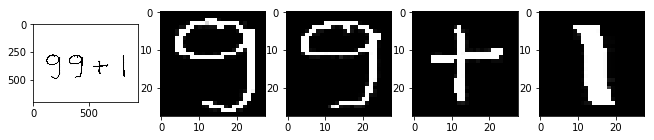

RF model_ver1 result :  7 0 + + 
adaboost_ver1 2 stage model result :  5 5 8 3 
MLP_ver1 single stage model result :  5 5 8 1 
CNN_ver1 model result :  5 5 + 1 

RF model_ver2 result :  7 0 + + 
adaboost_ver2 2 stage model result :  5 5 8 3 
MLP single_ver2 stage model result :  5 5 + 1 
CNN_ver2 model result :  9 7 + 1 


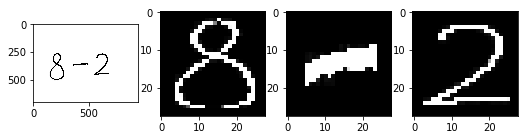

RF model_ver1 result :  - + 0 
adaboost_ver1 2 stage model result :  5 4 5 
MLP_ver1 single stage model result :  5 4 5 
CNN_ver1 model result :  times 2 2 

RF model_ver2 result :  - - 0 
adaboost_ver2 2 stage model result :  5 4 5 
MLP single_ver2 stage model result :  3 - 2 
CNN_ver2 model result :  times - 2 


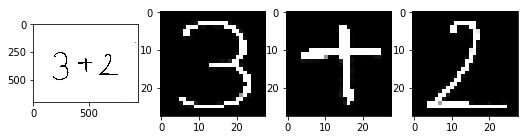

RF model_ver1 result :  - 7 1 
adaboost_ver1 2 stage model result :  3 9 1 
MLP_ver1 single stage model result :  3 7 3 
CNN_ver1 model result :  3 7 1 

RF model_ver2 result :  - + times 
adaboost_ver2 2 stage model result :  3 9 1 
MLP single_ver2 stage model result :  3 7 3 
CNN_ver2 model result :  3 7 1 


In [3]:
# Evaluating each equation image
for eqns in eqn_full:
    for c in range(len(eqns)):
        # initialising strings to store output of model predictions
        rf_pred_ver1 = ''
        ada_pred_ver1 = ''
        mlp_pred_ver1 = ''
        rf_pred_ver2 = ''
        ada_pred_ver2 = ''
        mlp_pred_ver2 = ''
        cnn_pred_ver1 = ''
        cnn_pred_ver2 = ''

#         print('\nEquation = ',c)
        eqn1 = eqns[c]
        # extract segments (digits/symbols) from each equation image
        segments= preprocess.extract_segments(eqn1, 30, reshape = 1, size = [28,28], 
                                              area=100, gray = True, dil = True,  ker = 1)

        # run prediction on each segment
        plt.figure(figsize=(20,20))
        for i in range(len(segments)+1):
            if i ==0:
                plt.subplot(191)
                plt.imshow(eqn1,cmap = 'gray')
                
            else :
                # plot each segment
                plt.subplot(191+i)
                temp = segments[i-1]
                plt.imshow(temp,cmap = 'gray')
                temp = temp.reshape(1,-1)
                
                pred = preprocess.predict(temp, label_class, 0, adastage1_ver1, adadigits_ver1, adachars_ver1,
                                             rfmodel_ver1, MLP_single_ver1, cnn_ver1 )
                
                ada_pred_ver1 += pred[0] 
                rf_pred_ver1 += pred[1] 
                mlp_pred_ver1 += pred[2] 
                cnn_pred_ver1 += pred[3]
                
                pred = preprocess.predict(temp, label_class, 0, adastage1_ver2, adadigits_ver2, adachars_ver2,
                                             rfmodel_ver2, MLP_single_ver2, cnn_ver2 )
                
                ada_pred_ver2 += pred[0] 
                rf_pred_ver2 += pred[1]
                mlp_pred_ver2 += pred[2] 
                cnn_pred_ver2 += pred[3]

                
        plt.show()
        print('RF model_ver1 result : ',rf_pred_ver1)
        print('adaboost_ver1 2 stage model result : ',ada_pred_ver1)
        print('MLP_ver1 single stage model result : ',mlp_pred_ver1)
        print('CNN_ver1 model result : ',cnn_pred_ver1)
        print('\nRF model_ver2 result : ',rf_pred_ver2)
        print('adaboost_ver2 2 stage model result : ',ada_pred_ver2)
        print('MLP single_ver2 stage model result : ',mlp_pred_ver2)
        print('CNN_ver2 model result : ',cnn_pred_ver2)